In [1]:
import os

import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import snkit

plt.style.use("dark_background")

In [2]:
root_dir = ".."
save_dir = os.path.join(root_dir, "results/multi-modal_network/")
nodes = gpd.read_parquet(os.path.join(save_dir, "nodes.gpq"))
edges = gpd.read_parquet(os.path.join(save_dir, "edges.gpq"))

In [3]:
network = snkit.network.Network(edges=edges, nodes=nodes)
network = snkit.network.add_component_ids(network)

/home/fred/micromamba/envs/open-gira/lib/python3.10/site-packages/snkit/network.py:906: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  network.edges.geometry.length,


Text(0.5, 1.0, 'Network components')

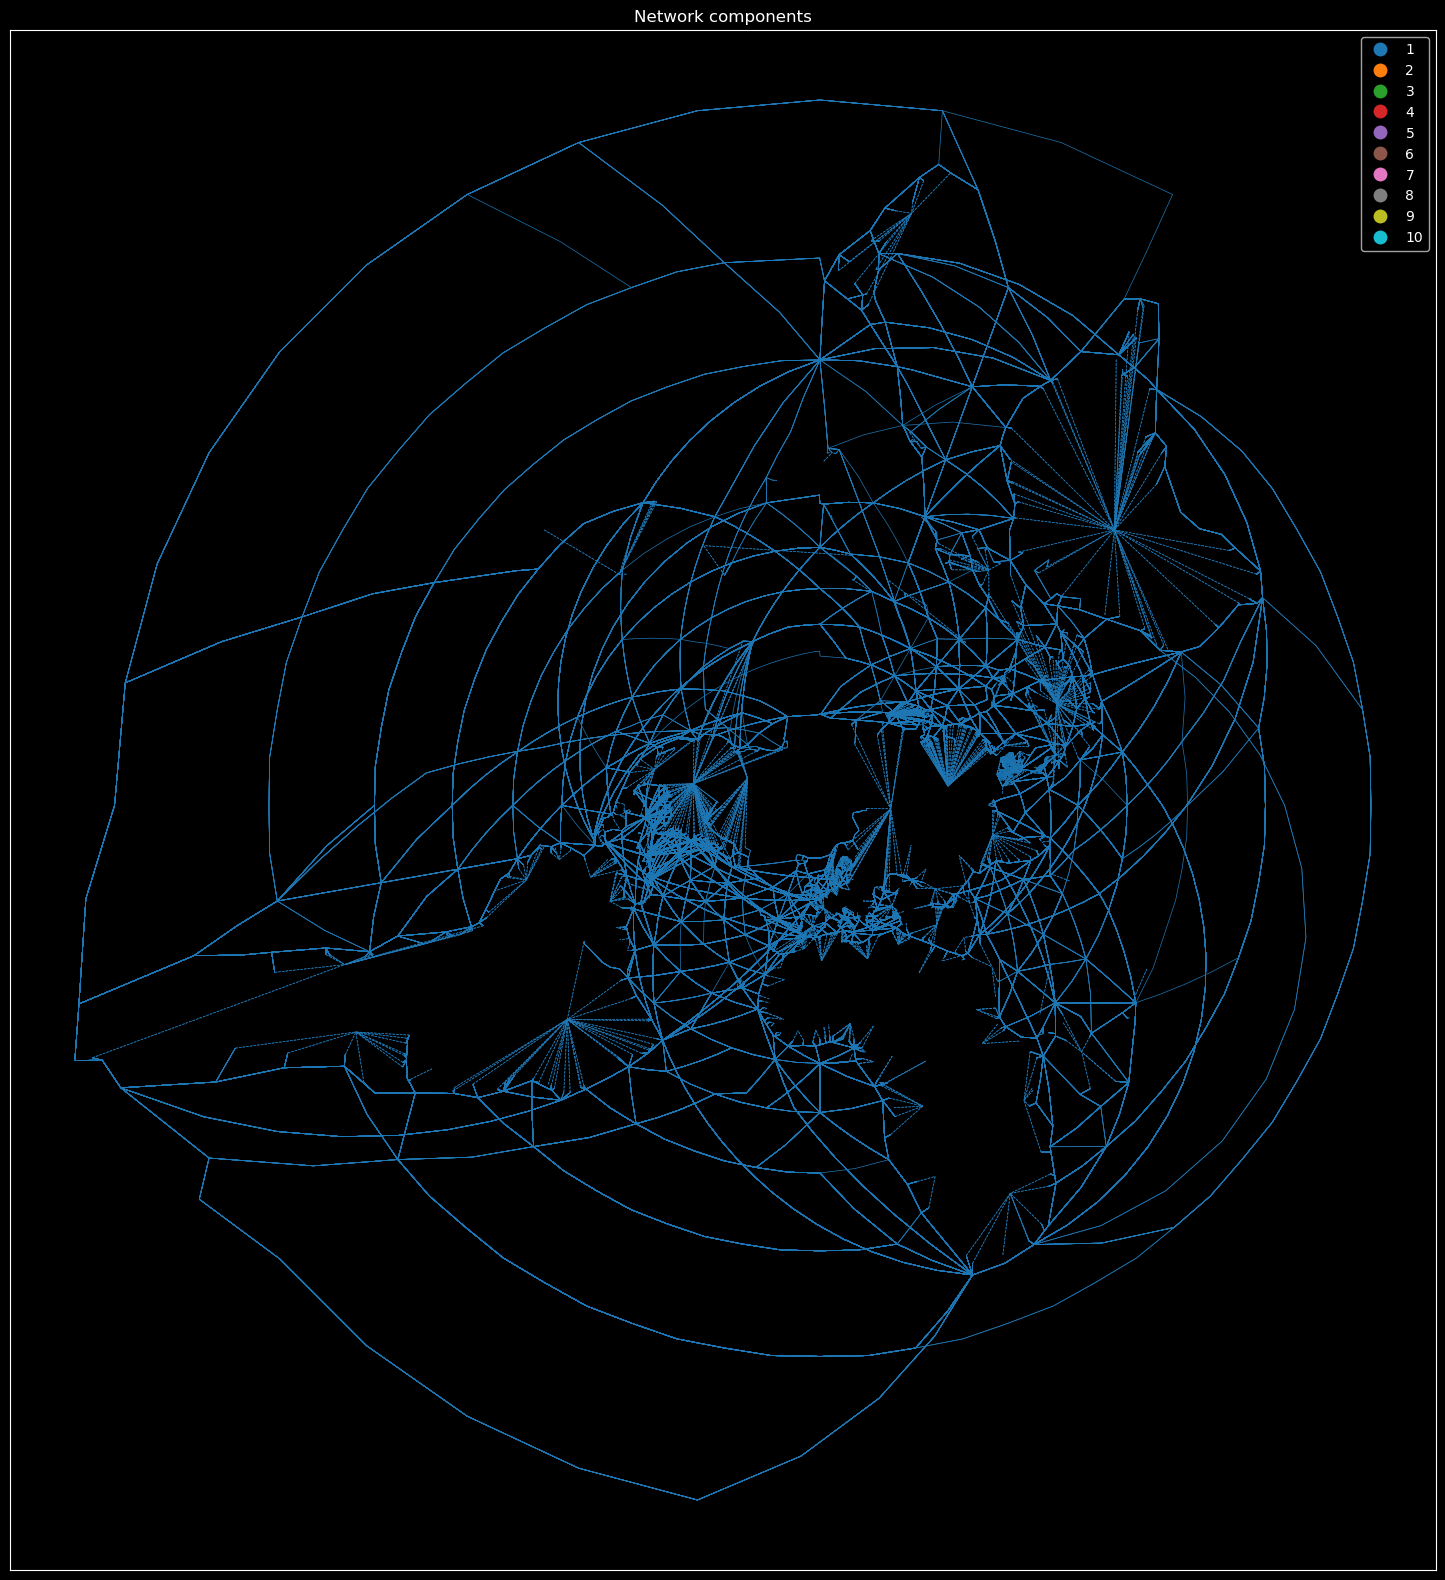

In [4]:
top_10_components = network.edges[network.edges.component_id.isin(range(1, 11))]
f, ax = plt.subplots(figsize=(20, 20))
top_10_components[top_10_components["mode"] != "imaginary"].to_crs(epsg=3995).plot(ax=ax, column="component_id", lw=0.5, categorical=True, legend=True)
top_10_components[top_10_components["mode"] == "imaginary"].to_crs(epsg=3995).plot(ax=ax, column="component_id", lw=0.5, ls="--", categorical=True)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Network components")